# Preprocessing RBNR Data for CNN:
---
This notebook creates augmented images with annotations for the RBNR dataset, converting annotations to required Darknet TXT format. Once that is completed, rerun YOLOv4 and save the weights & config files for object detection using an edge computer (i.e. Nvidia Jetson Nano!).



In [1]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

import scipy.io as sio
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
#Mount google drive 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%mkdir /usr/validation/
%mkdir /usr/validation/data/
%mkdir /usr/validation/data/bibs/
%cd /usr/validation/data/

/usr/validation/data


In [4]:
#Grab the Racing Bib Number Recognition Data
!wget https://people.csail.mit.edu/talidekel/Data/RBNR/RBNR_Datasets.zip 
!unzip -q RBNR_Datasets.zip

--2022-05-15 15:52:39--  https://people.csail.mit.edu/talidekel/Data/RBNR/RBNR_Datasets.zip
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56925300 (54M) [application/zip]
Saving to: ‘RBNR_Datasets.zip’

RBNR_Datasets.zip   100%[===================>]  54.29M  25.3MB/s    in 2.1s    

2022-05-15 15:52:42 (25.3 MB/s) - ‘RBNR_Datasets.zip’ saved [56925300/56925300]



In [5]:
%cp /usr/validation/data/RBNR_Datasets.zip /content/drive/MyDrive/bib-project/RBNR

# Import Functions to Crop Bibs
---

In [6]:
%cp "/content/drive/MyDrive/bib-project/clean code/utils.py" /usr/validation/data/
import utils as ut

# Execute Augmentation - Train & Testing Datasets
---

In [7]:
%mkdir /usr/validation/data/train
%mkdir /usr/validation/data/test

In [8]:
# RBNR Set1
num = 32 # number of augmented images per original
input_path = '/usr/validation/data/datasets/set1_org/'
output_path = '/usr/validation/data/train/'

for image_name in os.listdir(input_path):
    if image_name.endswith('.JPG'):
        ut.create_augmented_images(num, input_path, image_name, output_path)

In [9]:
# RBNR Set2
num = 32 # number of augmented images per original
input_path = '/usr/validation/data/datasets/set2_org/'
output_path = '/usr/validation/data/train/'

for image_name in os.listdir(input_path):
    if image_name.endswith('.JPG'):
        ut.create_augmented_images(num, input_path, image_name, output_path)

In [10]:
# RBNR Set3
num = 32 # number of augmented images per original
input_path = '/usr/validation/data/datasets/set3_org/'
output_path = '/usr/validation/data/test/'

for image_name in os.listdir(input_path):
    if image_name.endswith('.JPG'):
        ut.create_augmented_images(num, input_path, image_name, output_path)

# Test Annotation File
---

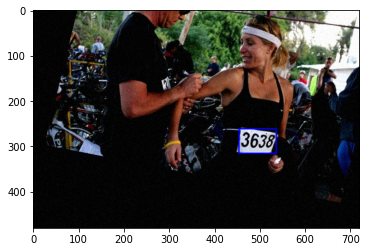

In [11]:
# set path and annotation file name
path = '/usr/validation/data/train/'
f_name = 'set1_01_1.txt'

# open the image
img = cv.imread(path + f_name[:-4] + '.JPG')

# get all bounding boxes for the image
boxes = ut.darknet_to_standard(path, f_name, img)

# mark boxes on image
for (x, y, w, h) in boxes:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# display image
RGB_im = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_im)

# Tar Train & Test Folder
---

In [12]:
!tar -czvf "/content/drive/MyDrive/bib-project/RBNR/train.tar.gz" "/usr/validation/data/train"
!tar -czvf "/content/drive/MyDrive/bib-project/RBNR/test.tar.gz" "/usr/validation/data/test"     

Streaming output truncated to the last 5000 lines.
/usr/validation/data/train/set2_30_31.JPG
/usr/validation/data/train/set2_26_8.JPG
/usr/validation/data/train/set1_38_30.txt
/usr/validation/data/train/set2_54_7.JPG
/usr/validation/data/train/set2_47_22.txt
/usr/validation/data/train/set2_33_13.txt
/usr/validation/data/train/set1_02_29.JPG
/usr/validation/data/train/set1_14_21.txt
/usr/validation/data/train/set2_22_2.txt
/usr/validation/data/train/set1_80_25.txt
/usr/validation/data/train/set1_61_24.txt
/usr/validation/data/train/set1_16_31.txt
/usr/validation/data/train/set1_13_8.txt
/usr/validation/data/train/set1_54_12.txt
/usr/validation/data/train/set2_08_30.txt
/usr/validation/data/train/set2_48_14.txt
/usr/validation/data/train/set1_11_22.txt
/usr/validation/data/train/set2_39_14.JPG
/usr/validation/data/train/set1_54_2.JPG
/usr/validation/data/train/set1_02_19.JPG
/usr/validation/data/train/set1_15_7.JPG
/usr/validation/data/train/set2_14_27.txt
/usr/validation/data/train/set2